# Clustering of Credit Card Users

MARIANO, Isaiah John L.

REGALARIO, Jeremiah Daniel A.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

try:
    from kneed import KneeLocator
except:
    !pip install kneed
    from kneed import KneeLocator


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Clustering Algorithm

## Data Preparation

### Load the Merged Dataset

In [ ]:
merged_df = pd.read_parquet("/content/drive/MyDrive/BPI Clustering Project/merged.parquet")

### Merged Dataset Summary Information

In [ ]:
merged_df.head()

,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred
CUST_NUM,,,,,,,,,,,,,,,
13401.256807,TARLAC,REGION III (CENTRAL LUZON),MID,23.0,1.295890,N,DIGITAL,SALARY,INDIVIDUAL,Lower Tier,MALE,SINGLE,17,4987.052711,85
3004.880031,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,NO_DATA,22.0,0.821918,N,DIGITAL,SALARY,INDIVIDUAL,Lower Tier,FEMALE,SINGLE,4,3315.591849,90
3205.814093,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,NO_DATA,22.0,3.271233,N,TRADITIONAL,SALARY,INDIVIDUAL,Lower Tier,FEMALE,SINGLE,16,55286.300324,91
3427.133496,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,NO_DATA,22.0,3.361644,N,DIGITAL,SALARY,INDIVIDUAL,Upper-Middle Tier,MALE,SINGLE,3,20828.764019,100
4230.004965,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,22.0,8.205479,N,DIGITAL,ALLOWANCE,INDIVIDUAL,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85


In [ ]:
orig_rows = merged_df.shape[0]
orig_rows

39616

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39616 entries, 13401.256806732717 to 13828.97696866981
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCE        39616 non-null  object 
 1   REGION          39616 non-null  object 
 2   EDUCATION       39616 non-null  object 
 3   AGE             39616 non-null  float64
 4   TENURE          39616 non-null  float64
 5   BUSINESS_OWNER  39616 non-null  object 
 6   DIGITAL_FLAG    39616 non-null  object 
 7   INCOME_SOURCE   39616 non-null  object 
 8   IDV_OR_ORG      39616 non-null  object 
 9   SUBSEGMENT      39616 non-null  object 
 10  GENDER          39616 non-null  object 
 11  MARITAL_STATUS  39616 non-null  object 
 12  Frequency_cred  39616 non-null  int64  
 13  AMOUNT_cred     39616 non-null  float64
 14  Recency_cred    39616 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 4.8+ MB


In [ ]:
merged_df.describe(include='all')

,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred
count,39616,39616,39616,39616.000000,39616.000000,39616,39616,39616,39616,39616,39616,39616,39616.000000,3.961600e+04,39616.000000
unique,55,16,4,NaN,NaN,2,3,11,1,4,3,6,NaN,NaN,NaN
top,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,MID,NaN,NaN,N,DIGITAL,SALARY,INDIVIDUAL,Upper-Middle Tier,FEMALE,SINGLE,NaN,NaN,NaN
freq,19932,19932,30578,NaN,NaN,35293,29477,29696,39616,14432,22914,21588,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.825803,11.158247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.332467,8.521000e+04,98.988893
std,NaN,NaN,NaN,12.097330,6.819716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.866802,1.804889e+05,19.370658
min,NaN,NaN,NaN,10.000000,0.257534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.285315e+01,85.000000
25%,NaN,NaN,NaN,31.000000,5.865753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.212801e+04,86.000000
50%,NaN,NaN,NaN,38.000000,9.882192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,3.586295e+04,91.000000
75%,NaN,NaN,NaN,48.000000,15.052055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,9.219641e+04,103.000000


Duplicates

In [ ]:
merged_df.duplicated().sum()

0

Duplicated Index Values

In [ ]:
merged_df[merged_df.index.duplicated()]

,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred
CUST_NUM,,,,,,,,,,,,,,,


Null Values

In [ ]:
merged_df_nulls = merged_df.replace('NO_DATA', np.nan, inplace=False).isnull().sum()
merged_df_nulls

,0
PROVINCE,0
REGION,0
EDUCATION,3644
AGE,0
TENURE,0
BUSINESS_OWNER,0
DIGITAL_FLAG,1028
INCOME_SOURCE,171
IDV_OR_ORG,0
SUBSEGMENT,0


### Remove Null Values

In [ ]:
merged_df.replace('NO_DATA', np.nan, inplace=True)
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

,0
PROVINCE,0
REGION,0
EDUCATION,0
AGE,0
TENURE,0
BUSINESS_OWNER,0
DIGITAL_FLAG,0
INCOME_SOURCE,0
IDV_OR_ORG,0
SUBSEGMENT,0


In [ ]:
merged_df.shape[0]

34853

Percentage loss from removing null values

In [ ]:
print(f"Percentage loss from removing null values: {((orig_rows - merged_df.shape[0]) / orig_rows) * 100:.2f}%)")

Percentage loss from removing null values: 12.02%)


### Remove `IDV_OR_ORG` column

We remove `IDV_OR_ORG` column since there is only one unique value for all rows.

In [ ]:
merged_df = merged_df.drop(columns=['IDV_OR_ORG'])
merged_df.head()

,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred
CUST_NUM,,,,,,,,,,,,,,
13401.256807,TARLAC,REGION III (CENTRAL LUZON),MID,23.0,1.295890,N,DIGITAL,SALARY,Lower Tier,MALE,SINGLE,17,4987.052711,85
4230.004965,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,22.0,8.205479,N,DIGITAL,ALLOWANCE,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85
4481.937304,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,23.0,7.073973,N,DIGITAL,SALARY,Upper-Middle Tier,FEMALE,SINGLE,42,20333.322087,92
4734.959768,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,23.0,3.468493,N,DIGITAL,SALARY,Lower Tier,FEMALE,SINGLE,11,49872.216089,92
4828.128416,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,MID,23.0,4.857534,N,DIGITAL,REMITTANCE,Middle Tier,FEMALE,SINGLE,1,2130.039143,127


### Add the Longitude and Latitude columns

In [ ]:
merged_df["PROVINCE"].unique()

array(['TARLAC', 'NATIONAL CAPITAL REGION', 'PAMPANGA', 'CAVITE', 'RIZAL',
       'LAGUNA', 'CEBU', 'CAMARINES SUR', 'BULACAN', 'DAVAO DEL SUR',
       'CAGAYAN', 'DAVAO DEL NORTE', 'LA UNION', 'BENGUET',
       'ORIENTAL MINDORO', 'NUEVA VIZCAYA', 'ILOILO', 'MISAMIS ORIENTAL',
       'LANAO DEL NORTE', 'ILOCOS NORTE', 'NEGROS OCCIDENTAL', 'PALAWAN',
       'MISAMIS OCCIDENTAL', 'BOHOL', 'BATANGAS', 'ZAMBOANGA DEL NORTE',
       'COTABATO CITY (NOT A PROVINCE)', 'PANGASINAN', 'ILOCOS SUR',
       'LEYTE', 'NUEVA ECIJA', 'ZAMBOANGA DEL SUR', 'QUEZON', 'ZAMBALES',
       'CAPIZ', 'ISABELA', 'AGUSAN DEL NORTE', 'ALBAY', 'AKLAN',
       'AGUSAN DEL SUR', 'SOUTH COTABATO', 'SURIGAO DEL NORTE',
       'NEGROS ORIENTAL', 'ANTIQUE', 'BATAAN', 'SORSOGON',
       'SOUTHERN LEYTE', 'COTABATO (NORTH COTABATO)', 'CAMARINES NORTE',
       'NORTHERN SAMAR', 'BUKIDNON', 'DAVAO ORIENTAL', 'SURIGAO DEL SUR',
       'SAMAR (WESTERN SAMAR)', 'SULTAN KUDARAT'], dtype=object)

In [ ]:
merged_df = merged_df.replace("COTABATO CITY (NOT A PROVINCE)", "COTABATO CITY")
merged_df = merged_df.replace("SAMAR (WESTERN SAMAR)", "SAMAR")
merged_df = merged_df.replace("COTABATO (NORTH COTABATO)", "NORTH COTABATO")

In [ ]:
merged_df.isnull().sum()

,0
PROVINCE,0
REGION,0
EDUCATION,0
AGE,0
TENURE,0
BUSINESS_OWNER,0
DIGITAL_FLAG,0
INCOME_SOURCE,0
SUBSEGMENT,0
GENDER,0


In [ ]:
provinces = pd.read_parquet("/content/drive/MyDrive/BPI Clustering Project/provinces.parquet")
provinces

,PROVINCE,LATITUDE,LONGITUDE
0,ABRA,17.583333,120.750000
1,AGUSAN DEL NORTE,8.920000,125.460000
2,AGUSAN DEL SUR,8.360000,125.710000
3,AKLAN,11.629789,122.248118
4,ALBAY,13.216667,123.550000
5,ANTIQUE,11.170507,122.083333
6,APAYAO,18.120000,121.190000
7,AURORA,16.000000,121.750000
8,BASILAN,6.578645,122.034922
9,BATAAN,14.666667,120.416667


In [ ]:
provinces.dtypes

,0
PROVINCE,object
LATITUDE,float64
LONGITUDE,float64


In [ ]:
merged_df["LATITUDE"] = merged_df["PROVINCE"].map(provinces.set_index("PROVINCE")["LATITUDE"])
merged_df["LONGITUDE"] = merged_df["PROVINCE"].map(provinces.set_index("PROVINCE")["LONGITUDE"])
merged_df.head()

,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE
CUST_NUM,,,,,,,,,,,,,,,,
13401.256807,TARLAC,REGION III (CENTRAL LUZON),MID,23.0,1.295890,N,DIGITAL,SALARY,Lower Tier,MALE,SINGLE,17,4987.052711,85,15.527737,120.419269
4230.004965,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,22.0,8.205479,N,DIGITAL,ALLOWANCE,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85,14.608637,121.031947
4481.937304,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,23.0,7.073973,N,DIGITAL,SALARY,Upper-Middle Tier,FEMALE,SINGLE,42,20333.322087,92,14.608637,121.031947
4734.959768,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,LOW,23.0,3.468493,N,DIGITAL,SALARY,Lower Tier,FEMALE,SINGLE,11,49872.216089,92,14.608637,121.031947
4828.128416,NATIONAL CAPITAL REGION,NATIONAL CAPITAL REGION,MID,23.0,4.857534,N,DIGITAL,REMITTANCE,Middle Tier,FEMALE,SINGLE,1,2130.039143,127,14.608637,121.031947


In [ ]:
merged_df.drop(["PROVINCE", "REGION"], axis=1, inplace=True)

In [ ]:
merged_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE
CUST_NUM,,,,,,,,,,,,,,
13401.256807,MID,23.0,1.295890,N,DIGITAL,SALARY,Lower Tier,MALE,SINGLE,17,4987.052711,85,15.527737,120.419269
4230.004965,LOW,22.0,8.205479,N,DIGITAL,ALLOWANCE,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85,14.608637,121.031947
4481.937304,LOW,23.0,7.073973,N,DIGITAL,SALARY,Upper-Middle Tier,FEMALE,SINGLE,42,20333.322087,92,14.608637,121.031947
4734.959768,LOW,23.0,3.468493,N,DIGITAL,SALARY,Lower Tier,FEMALE,SINGLE,11,49872.216089,92,14.608637,121.031947
4828.128416,MID,23.0,4.857534,N,DIGITAL,REMITTANCE,Middle Tier,FEMALE,SINGLE,1,2130.039143,127,14.608637,121.031947


In [ ]:
grouped_df = merged_df.groupby(['LATITUDE', 'LONGITUDE']).agg({'Frequency_cred': 'sum'}).reset_index()

# Display the aggregated data
grouped_df.head()

,LATITUDE,LONGITUDE,Frequency_cred
0,6.285524,124.933310,4671
1,6.555670,124.327150,588
2,6.698366,125.361214,21331
3,7.166667,126.333333,175
4,7.221916,124.253390,853


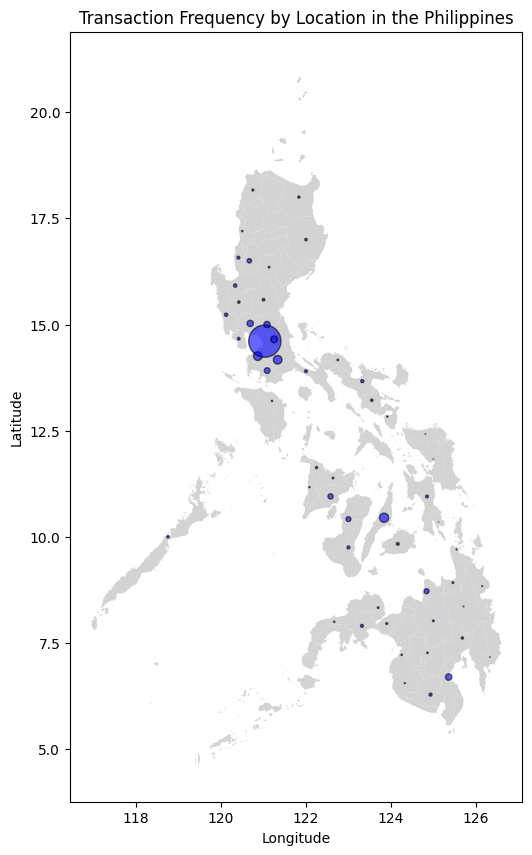

In [ ]:
shapefile_path = '/content/drive/MyDrive/BPI Clustering Project/gadm41_PHL_1.shp'

gdf = gpd.read_file(shapefile_path)

# Convert the aggregated data to a GeoDataFrame
geometry = gpd.points_from_xy(grouped_df.LONGITUDE, grouped_df.LATITUDE)
geo_df = gpd.GeoDataFrame(grouped_df, geometry=geometry)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgray')

# Plot the transactions
geo_df.plot(ax=ax, markersize=geo_df['Frequency_cred'] / 1000, color='blue', alpha=0.6, edgecolor='k')

# Add titles and labels
plt.title("Transaction Frequency by Location in the Philippines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [ ]:
# Coordinates to center the map on the Philippines
philippines_center = {"lat": 12.8797, "lon": 121.7740}

# Create a scatter map plot
fig = px.scatter_mapbox(
    grouped_df,
    lat='LATITUDE',
    lon='LONGITUDE',
    size='Frequency_cred',
    color='Frequency_cred',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=5,
    center=philippines_center,
    mapbox_style="carto-positron",
    title="Transaction Amounts by Location in the Philippines"
)

fig.update_layout(
    mapbox=dict(
        center=philippines_center,
        zoom=5,
        style="carto-positron"
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

### Convert `BUSINESS_OWNER` to binary

In [ ]:
merged_df["BUSINESS_OWNER"] = merged_df["BUSINESS_OWNER"].str.replace("Y", "1").str.replace("N", "0")
merged_df["BUSINESS_OWNER"] = merged_df["BUSINESS_OWNER"].astype(int)
merged_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE
CUST_NUM,,,,,,,,,,,,,,
13401.256807,MID,23.0,1.295890,0,DIGITAL,SALARY,Lower Tier,MALE,SINGLE,17,4987.052711,85,15.527737,120.419269
4230.004965,LOW,22.0,8.205479,0,DIGITAL,ALLOWANCE,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85,14.608637,121.031947
4481.937304,LOW,23.0,7.073973,0,DIGITAL,SALARY,Upper-Middle Tier,FEMALE,SINGLE,42,20333.322087,92,14.608637,121.031947
4734.959768,LOW,23.0,3.468493,0,DIGITAL,SALARY,Lower Tier,FEMALE,SINGLE,11,49872.216089,92,14.608637,121.031947
4828.128416,MID,23.0,4.857534,0,DIGITAL,REMITTANCE,Middle Tier,FEMALE,SINGLE,1,2130.039143,127,14.608637,121.031947


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 13401.256806732717 to 13828.97696866981
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDUCATION       34853 non-null  object 
 1   AGE             34853 non-null  float64
 2   TENURE          34853 non-null  float64
 3   BUSINESS_OWNER  34853 non-null  int64  
 4   DIGITAL_FLAG    34853 non-null  object 
 5   INCOME_SOURCE   34853 non-null  object 
 6   SUBSEGMENT      34853 non-null  object 
 7   GENDER          34853 non-null  object 
 8   MARITAL_STATUS  34853 non-null  object 
 9   Frequency_cred  34853 non-null  int64  
 10  AMOUNT_cred     34853 non-null  float64
 11  Recency_cred    34853 non-null  int64  
 12  LATITUDE        34853 non-null  float64
 13  LONGITUDE       34853 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 4.0+ MB


### Convert `DIGITAL_FLAG` to binary

Closer to 1 implies more traditional.

In [ ]:
merged_df["DIGITAL_FLAG"] = merged_df["DIGITAL_FLAG"].str.replace("TRADITIONAL", "1").str.replace("DIGITAL", "0")
merged_df["DIGITAL_FLAG"] = merged_df["DIGITAL_FLAG"].astype(int)
merged_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE
CUST_NUM,,,,,,,,,,,,,,
13401.256807,MID,23.0,1.295890,0,0,SALARY,Lower Tier,MALE,SINGLE,17,4987.052711,85,15.527737,120.419269
4230.004965,LOW,22.0,8.205479,0,0,ALLOWANCE,Upper-Middle Tier,MALE,SINGLE,83,131910.554528,85,14.608637,121.031947
4481.937304,LOW,23.0,7.073973,0,0,SALARY,Upper-Middle Tier,FEMALE,SINGLE,42,20333.322087,92,14.608637,121.031947
4734.959768,LOW,23.0,3.468493,0,0,SALARY,Lower Tier,FEMALE,SINGLE,11,49872.216089,92,14.608637,121.031947
4828.128416,MID,23.0,4.857534,0,0,REMITTANCE,Middle Tier,FEMALE,SINGLE,1,2130.039143,127,14.608637,121.031947


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 13401.256806732717 to 13828.97696866981
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDUCATION       34853 non-null  object 
 1   AGE             34853 non-null  float64
 2   TENURE          34853 non-null  float64
 3   BUSINESS_OWNER  34853 non-null  int64  
 4   DIGITAL_FLAG    34853 non-null  int64  
 5   INCOME_SOURCE   34853 non-null  object 
 6   SUBSEGMENT      34853 non-null  object 
 7   GENDER          34853 non-null  object 
 8   MARITAL_STATUS  34853 non-null  object 
 9   Frequency_cred  34853 non-null  int64  
 10  AMOUNT_cred     34853 non-null  float64
 11  Recency_cred    34853 non-null  int64  
 12  LATITUDE        34853 non-null  float64
 13  LONGITUDE       34853 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 4.0+ MB


## Convert Categorical to Numerical




### Convert `EDUCATION`, `REGION`, and `SUBSEGMENT` using Label Encoding.

In [ ]:
#Education
educ_labels = {'LOW': 0, 'MID': 1, 'HIGH': 2}
merged_df['EDUCATION'] = merged_df['EDUCATION'].map(educ_labels)

In [ ]:
#Subsegment
subseg_labels = {'Lower Tier': 0, 'Middle Tier': 1, 'Upper-Middle Tier': 2, 'Top Tier': 3}
merged_df['SUBSEGMENT'] = merged_df['SUBSEGMENT'].map(subseg_labels)
merged_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,SUBSEGMENT,GENDER,MARITAL_STATUS,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE
CUST_NUM,,,,,,,,,,,,,,
13401.256807,1,23.0,1.295890,0,0,SALARY,0,MALE,SINGLE,17,4987.052711,85,15.527737,120.419269
4230.004965,0,22.0,8.205479,0,0,ALLOWANCE,2,MALE,SINGLE,83,131910.554528,85,14.608637,121.031947
4481.937304,0,23.0,7.073973,0,0,SALARY,2,FEMALE,SINGLE,42,20333.322087,92,14.608637,121.031947
4734.959768,0,23.0,3.468493,0,0,SALARY,0,FEMALE,SINGLE,11,49872.216089,92,14.608637,121.031947
4828.128416,1,23.0,4.857534,0,0,REMITTANCE,1,FEMALE,SINGLE,1,2130.039143,127,14.608637,121.031947


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 13401.256806732717 to 13828.97696866981
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDUCATION       34853 non-null  int64  
 1   AGE             34853 non-null  float64
 2   TENURE          34853 non-null  float64
 3   BUSINESS_OWNER  34853 non-null  int64  
 4   DIGITAL_FLAG    34853 non-null  int64  
 5   INCOME_SOURCE   34853 non-null  object 
 6   SUBSEGMENT      34853 non-null  int64  
 7   GENDER          34853 non-null  object 
 8   MARITAL_STATUS  34853 non-null  object 
 9   Frequency_cred  34853 non-null  int64  
 10  AMOUNT_cred     34853 non-null  float64
 11  Recency_cred    34853 non-null  int64  
 12  LATITUDE        34853 non-null  float64
 13  LONGITUDE       34853 non-null  float64
dtypes: float64(5), int64(6), object(3)
memory usage: 4.0+ MB


### Save to Parquet File (Dataset for Cluster Analysis)

In [ ]:
merged_df.to_parquet("/content/drive/MyDrive/BPI Clustering Project/cluster_analysis.parquet")

### Convert `INCOME_SOURCE`,`GENDER`, and `MARITAL_STATUS` using One-Hot Encoding.

In [ ]:
print(merged_df.columns)

Index(['EDUCATION', 'AGE', 'TENURE', 'BUSINESS_OWNER', 'DIGITAL_FLAG',
       'INCOME_SOURCE', 'SUBSEGMENT', 'GENDER', 'MARITAL_STATUS',
       'Frequency_cred', 'AMOUNT_cred', 'Recency_cred', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [ ]:
cat_cols = ['INCOME_SOURCE', 'GENDER', 'MARITAL_STATUS']
for c in cat_cols:
  merged_df = pd.get_dummies(merged_df, columns=[c], prefix=c, dummy_na=False)
merged_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,1,23.0,1.295890,0,0,0,17,4987.052711,85,15.527737,120.419269,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
4230.004965,0,22.0,8.205479,0,0,2,83,131910.554528,85,14.608637,121.031947,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4481.937304,0,23.0,7.073973,0,0,2,42,20333.322087,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
4734.959768,0,23.0,3.468493,0,0,0,11,49872.216089,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
4828.128416,1,23.0,4.857534,0,0,1,1,2130.039143,127,14.608637,121.031947,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False


## Data Preparation Part 2 (Different Trials)

### Columns to Scale

In [ ]:
# Columns to scale (edit for multiple trials)
columns_to_scale = ['EDUCATION',	'AGE',	'TENURE',	'BUSINESS_OWNER',	'DIGITAL_FLAG',	'SUBSEGMENT',	'Frequency_cred',	'AMOUNT_cred',	'Recency_cred']

### Data Binning (RFM)

In [ ]:
merged_binned_df = merged_df.copy()

In [ ]:
# Define the number of bins
num_bins = 4

# Apply pd.qcut to the Frequency_cred column
merged_binned_df['Frequency_bins'] = pd.qcut(merged_binned_df['Frequency_cred'], q=num_bins, labels=False)

# Apply pd.qcut to the Recency_cred column
merged_binned_df['Recency_bins'] = pd.qcut(merged_binned_df['Recency_cred'], q=num_bins, labels=False)

# Apply pd.qcut to the AMOUNT_cred column
merged_binned_df['Amount_bins'] = pd.qcut(merged_binned_df['AMOUNT_cred'], q=num_bins, labels=False)

merged_binned_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,Frequency_bins,Recency_bins,Amount_bins
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,1,23.0,1.295890,0,0,0,17,4987.052711,85,15.527737,120.419269,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,2,0,0
4230.004965,0,22.0,8.205479,0,0,2,83,131910.554528,85,14.608637,121.031947,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3,0,3
4481.937304,0,23.0,7.073973,0,0,2,42,20333.322087,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,3,2,1
4734.959768,0,23.0,3.468493,0,0,0,11,49872.216089,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,1,2,2
4828.128416,1,23.0,4.857534,0,0,1,1,2130.039143,127,14.608637,121.031947,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,0,3,0


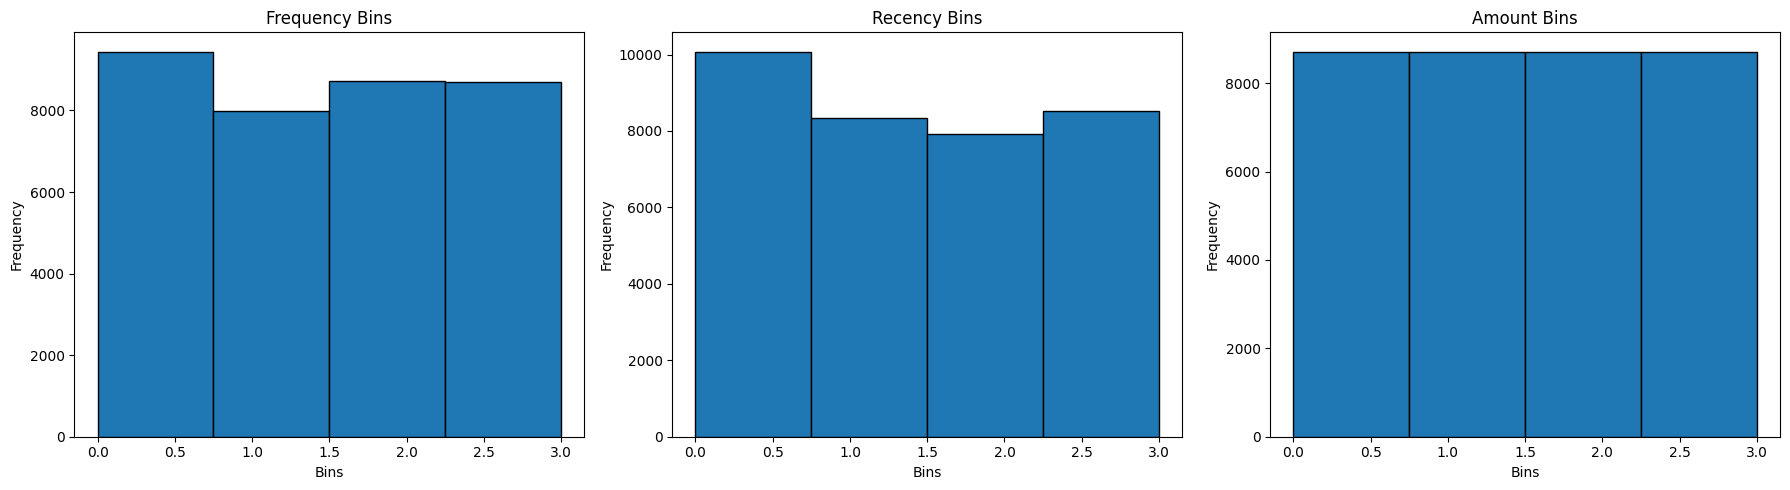

In [ ]:
# Plot histograms of the binned features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Frequency_bins histogram
axes[0].hist(merged_binned_df['Frequency_bins'], bins=num_bins, edgecolor='black')
axes[0].set_title('Frequency Bins')
axes[0].set_xlabel('Bins')
axes[0].set_ylabel('Frequency')

# Plot Recency_bins histogram
axes[1].hist(merged_binned_df['Recency_bins'], bins=num_bins, edgecolor='black')
axes[1].set_title('Recency Bins')
axes[1].set_xlabel('Bins')
axes[1].set_ylabel('Frequency')

# Plot Amount_bins histogram
axes[2].hist(merged_binned_df['Amount_bins'], bins=num_bins, edgecolor='black')
axes[2].set_title('Amount Bins')
axes[2].set_xlabel('Bins')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### EDA

Amount

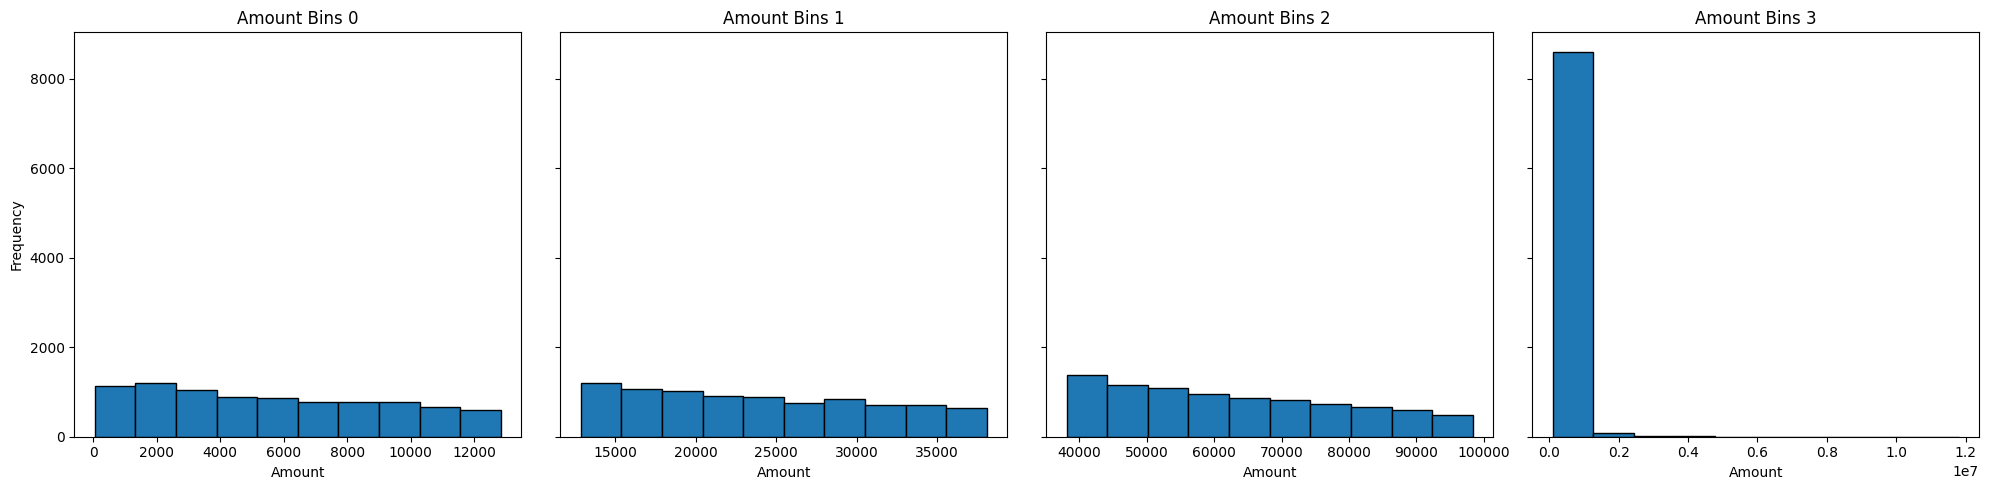

In [ ]:
# Plot histograms of the original AMOUNT_cred values within each Amount_bins category
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Iterate over each bin category
for i in range(num_bins):
    amount_bin = merged_binned_df[merged_binned_df['Amount_bins'] == i]
    axes[i].hist(amount_bin['AMOUNT_cred'], bins=10, edgecolor='black')
    axes[i].set_title(f'Amount Bins {i}')
    axes[i].set_xlabel('Amount')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Print the minimum and maximum amounts of each bin
for i in range(num_bins):
    amount_bin = merged_binned_df[merged_binned_df['Amount_bins'] == i]
    min_amount = amount_bin['AMOUNT_cred'].min()
    max_amount = amount_bin['AMOUNT_cred'].max()
    print(f'Amount Bins {i}: Min = {min_amount}, Max = {max_amount}')

Amount Bins 0: Min = 52.85314942421726, Max = 12837.543977521125
Amount Bins 1: Min = 12838.094555300502, Max = 38087.88186086788
Amount Bins 2: Min = 38090.27681809425, Max = 98367.06697180255
Amount Bins 3: Min = 98398.24913239093, Max = 11798600.872116514


Recency

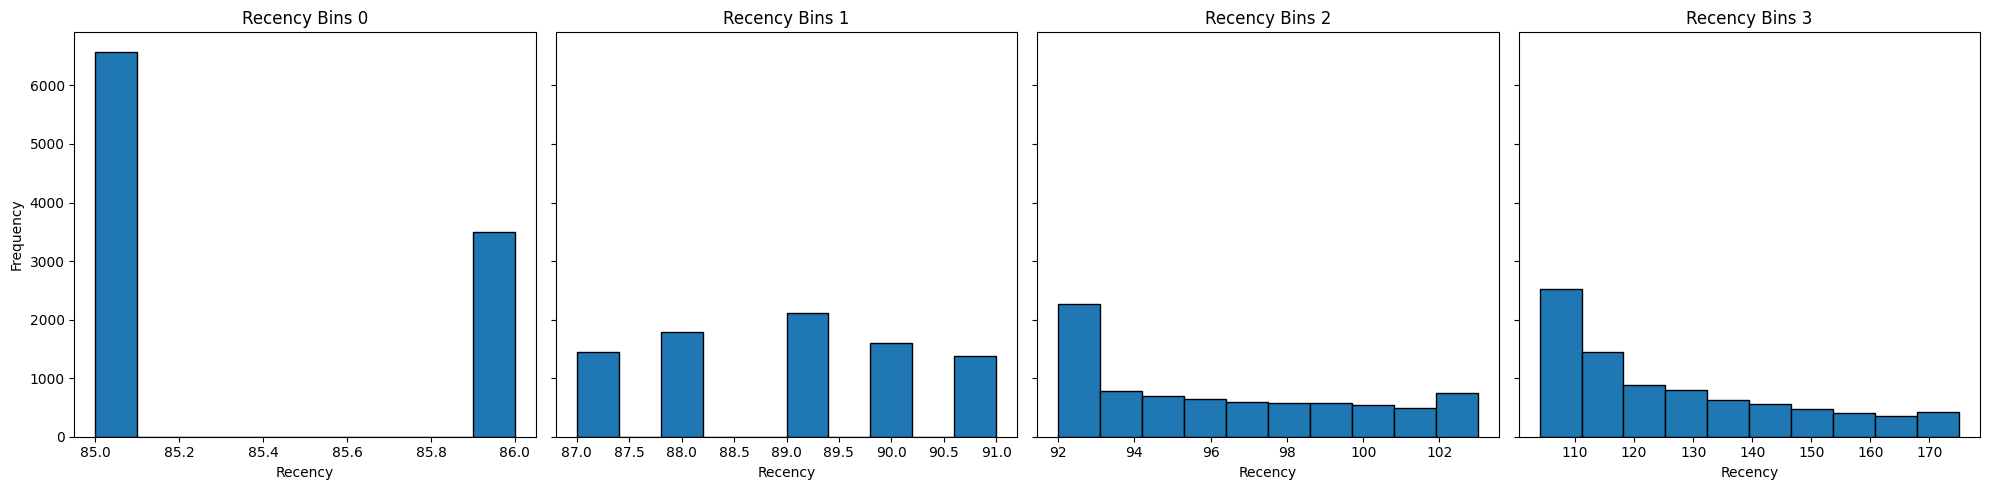

In [ ]:
# Plot histograms of the original Recency_cred values within each Recency_bins category
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Iterate over each bin category
for i in range(num_bins):
    recency_bin = merged_binned_df[merged_binned_df['Recency_bins'] == i]
    axes[i].hist(recency_bin['Recency_cred'], bins=10, edgecolor='black')
    axes[i].set_title(f'Recency Bins {i}')
    axes[i].set_xlabel('Recency')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Print the minimum and maximum amounts of each bin
for i in range(num_bins):
    recency_bin = merged_binned_df[merged_binned_df['Recency_bins'] == i]
    min_recency = recency_bin['Recency_cred'].min()
    max_recency = recency_bin['Recency_cred'].max()
    print(f'Recency Bins {i}: Min = {min_recency}, Max = {max_recency}')

Recency Bins 0: Min = 85, Max = 86
Recency Bins 1: Min = 87, Max = 91
Recency Bins 2: Min = 92, Max = 103
Recency Bins 3: Min = 104, Max = 175


Frequency

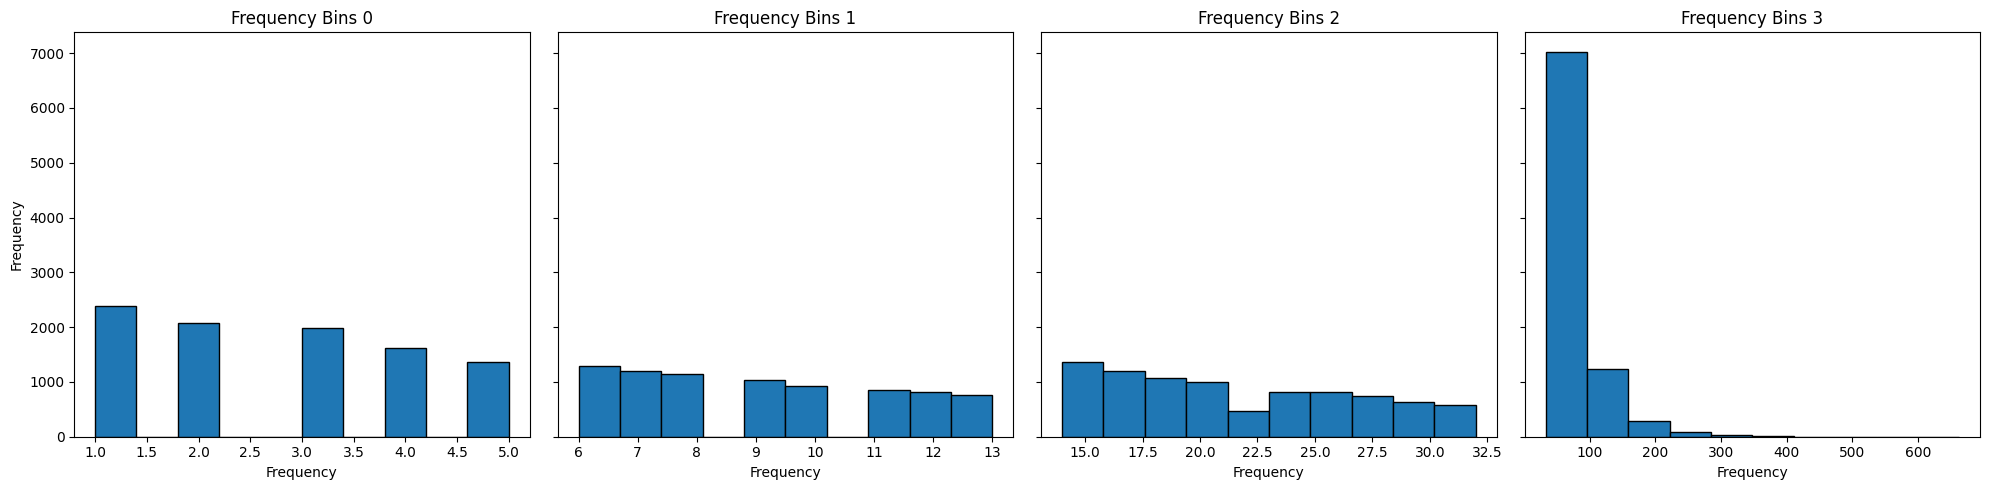

In [ ]:
# Plot histograms of the original Frequency_cred values within each Frequency_bins category
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Iterate over each bin category
for i in range(num_bins):
    frequency_bin = merged_binned_df[merged_binned_df['Frequency_bins'] == i]
    axes[i].hist(frequency_bin['Frequency_cred'], bins=10, edgecolor='black')
    axes[i].set_title(f'Frequency Bins {i}')
    axes[i].set_xlabel('Frequency')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Print the minimum and maximum amounts of each bin
for i in range(num_bins):
    Frequency_bin = merged_binned_df[merged_binned_df['Frequency_bins'] == i]
    min_Frequency = Frequency_bin['Frequency_cred'].min()
    max_Frequency = Frequency_bin['Frequency_cred'].max()
    print(f'Frequency Bins {i}: Min = {min_Frequency}, Max = {max_Frequency}')

Frequency Bins 0: Min = 1, Max = 5
Frequency Bins 1: Min = 6, Max = 13
Frequency Bins 2: Min = 14, Max = 32
Frequency Bins 3: Min = 33, Max = 663


## Standardize

### MinMax Scaler (`merged_df`)

#### Scale All Except Longitude and Latitude

In [ ]:
minmax_scaled_all_except_long_lat_df = merged_df.copy()

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

In [ ]:
# Implement scaler
minmax_scaled_all_except_long_lat_df[columns_to_scale] = scaler.fit_transform(minmax_scaled_all_except_long_lat_df[columns_to_scale])
minmax_scaled_all_except_long_lat_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,0.5,0.151163,0.031125,0.0,0.0,0.000000,0.024169,0.000418,0.000000,15.527737,120.419269,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
4230.004965,0.0,0.139535,0.255402,0.0,0.0,0.666667,0.123867,0.011176,0.000000,14.608637,121.031947,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4481.937304,0.0,0.151163,0.218675,0.0,0.0,0.666667,0.061934,0.001719,0.077778,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
4734.959768,0.0,0.151163,0.101645,0.0,0.0,0.000000,0.015106,0.004222,0.077778,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
4828.128416,0.5,0.151163,0.146732,0.0,0.0,0.333333,0.000000,0.000176,0.466667,14.608637,121.031947,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Save parquet file
minmax_scaled_all_except_long_lat_df.to_parquet("/content/drive/MyDrive/BPI Clustering Project/Scaled Datasets/minmax_scaled_all_except_long_lat_df.parquet")

#### Scale All

In [ ]:
minmax_scaled_all_df = merged_df.copy()

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

In [ ]:
minmax_scaled_all_df[list(minmax_scaled_all_df.columns)] = scaler.fit_transform(minmax_scaled_all_df[list(minmax_scaled_all_df.columns)])
minmax_scaled_all_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,0.5,0.151163,0.031125,0.0,0.0,0.000000,0.024169,0.000418,0.000000,0.777889,0.220123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4230.004965,0.0,0.139535,0.255402,0.0,0.0,0.666667,0.123867,0.011176,0.000000,0.700531,0.300916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4481.937304,0.0,0.151163,0.218675,0.0,0.0,0.666667,0.061934,0.001719,0.077778,0.700531,0.300916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4734.959768,0.0,0.151163,0.101645,0.0,0.0,0.000000,0.015106,0.004222,0.077778,0.700531,0.300916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4828.128416,0.5,0.151163,0.146732,0.0,0.0,0.333333,0.000000,0.000176,0.466667,0.700531,0.300916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Save parquet file
minmax_scaled_all_df.to_parquet("/content/drive/MyDrive/BPI Clustering Project/Scaled Datasets/minmax_scaled_all_df.parquet")

### MinMax Scaler (`merged_binned_df`)

#### Scale All Except Longitude and Latitude

In [ ]:
minmax_binned_scaled_all_except_long_lat_df = merged_binned_df.copy()

In [ ]:
# Drop old columns
minmax_binned_scaled_all_except_long_lat_df.drop(['Frequency_cred', 'Recency_cred', 'AMOUNT_cred'], axis=1, inplace=True)

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

In [ ]:
# Columns to scale (edit for multiple trials)
columns_to_scale = ['EDUCATION',	'AGE',	'TENURE',	'BUSINESS_OWNER',	'DIGITAL_FLAG',	'SUBSEGMENT',	'Frequency_bins',	'Amount_bins',	'Recency_bins']

# Implement scaler
minmax_binned_scaled_all_except_long_lat_df[columns_to_scale] = scaler.fit_transform(minmax_binned_scaled_all_except_long_lat_df[columns_to_scale])
minmax_binned_scaled_all_except_long_lat_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,Frequency_bins,Recency_bins,Amount_bins
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,0.5,0.151163,0.031125,0.0,0.0,0.000000,15.527737,120.419269,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,0.666667,0.000000,0.000000
4230.004965,0.0,0.139535,0.255402,0.0,0.0,0.666667,14.608637,121.031947,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1.000000,0.000000,1.000000
4481.937304,0.0,0.151163,0.218675,0.0,0.0,0.666667,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,1.000000,0.666667,0.333333
4734.959768,0.0,0.151163,0.101645,0.0,0.0,0.000000,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,0.333333,0.666667,0.666667
4828.128416,0.5,0.151163,0.146732,0.0,0.0,0.333333,14.608637,121.031947,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,0.000000,1.000000,0.000000


In [ ]:
# Save parquet file
minmax_binned_scaled_all_except_long_lat_df.to_parquet("/content/drive/MyDrive/BPI Clustering Project/Scaled Datasets/minmax_binned_scaled_all_except_long_lat_df.parquet")

### Standard Scaler (`merged_binned_df`)

In [ ]:
stdscale_binned_scaled_all_df = merged_binned_df.copy()
stdscale_binned_scaled_all_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,Frequency_cred,AMOUNT_cred,Recency_cred,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,Frequency_bins,Recency_bins,Amount_bins
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,1,23.0,1.295890,0,0,0,17,4987.052711,85,15.527737,120.419269,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,2,0,0
4230.004965,0,22.0,8.205479,0,0,2,83,131910.554528,85,14.608637,121.031947,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3,0,3
4481.937304,0,23.0,7.073973,0,0,2,42,20333.322087,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,3,2,1
4734.959768,0,23.0,3.468493,0,0,0,11,49872.216089,92,14.608637,121.031947,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,1,2,2
4828.128416,1,23.0,4.857534,0,0,1,1,2130.039143,127,14.608637,121.031947,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,0,3,0


In [ ]:
# Drop old columns
stdscale_binned_scaled_all_df.drop(['Frequency_cred', 'Recency_cred', 'AMOUNT_cred'], axis=1, inplace=True)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
stdscale_binned_scaled_all_df[list(stdscale_binned_scaled_all_df.columns)] = scaler.fit_transform(stdscale_binned_scaled_all_df[list(stdscale_binned_scaled_all_df.columns)])
stdscale_binned_scaled_all_df.head()

,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,Frequency_bins,Recency_bins,Amount_bins
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,0.054966,-1.524019,-1.623024,-0.366542,-0.5594,-1.457183,0.817697,-0.915328,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,-1.172048,1.219359,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,0.459716,-1.245697,-1.341587
4230.004965,-2.533880,-1.606718,-0.570143,-0.366542,-0.5594,1.078311,0.417464,-0.444865,4.296519,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,-1.734473,-1.172048,1.219359,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,1.340169,-1.245697,1.341664
4481.937304,-2.533880,-1.524019,-0.742562,-0.366542,-0.5594,1.078311,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,1.340169,0.500594,-0.447170
4734.959768,-2.533880,-1.524019,-1.291964,-0.366542,-0.5594,-1.457183,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,-0.420737,0.500594,0.447247
4828.128416,0.054966,-1.524019,-1.080302,-0.366542,-0.5594,-0.189436,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,5.438089,-1.734473,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,-1.301190,1.373739,-1.341587


## Remove `TENURE` and `Frequency_bins`

In [ ]:
stdscale_binned_scaled_all_notenfreq_df = stdscale_binned_scaled_all_df.drop(['Frequency_bins','TENURE'], axis=1)
stdscale_binned_scaled_all_notenfreq_df.head()

,EDUCATION,AGE,BUSINESS_OWNER,DIGITAL_FLAG,SUBSEGMENT,LATITUDE,LONGITUDE,INCOME_SOURCE_ALLOWANCE,INCOME_SOURCE_BUSINESS,INCOME_SOURCE_COMMISSION,INCOME_SOURCE_DONATION,INCOME_SOURCE_ECONOMICALLY_INACTIVE,INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS,INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED,INCOME_SOURCE_PENSION,INCOME_SOURCE_REMITTANCE,INCOME_SOURCE_SALARY,GENDER_FEMALE,GENDER_MALE,GENDER_OTHERS,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHERS,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,Recency_bins,Amount_bins
CUST_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401.256807,0.054966,-1.524019,-0.366542,-0.5594,-1.457183,0.817697,-0.915328,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,-1.172048,1.219359,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,-1.245697,-1.341587
4230.004965,-2.533880,-1.606718,-0.366542,-0.5594,1.078311,0.417464,-0.444865,4.296519,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,-1.734473,-1.172048,1.219359,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,-1.245697,1.341664
4481.937304,-2.533880,-1.524019,-0.366542,-0.5594,1.078311,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,0.500594,-0.447170
4734.959768,-2.533880,-1.524019,-0.366542,-0.5594,-1.457183,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,-0.183888,0.576544,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,0.500594,0.447247
4828.128416,0.054966,-1.524019,-0.366542,-0.5594,-0.189436,0.417464,-0.444865,-0.232747,-0.348316,-0.095806,-0.014173,-0.030785,-0.089343,-0.092076,-0.177711,5.438089,-1.734473,0.853207,-0.820103,-0.139788,-0.154641,-0.771287,-0.112944,-0.115011,0.913808,-0.184886,1.373739,-1.341587


In [ ]:
# Save parquet file
stdscale_binned_scaled_all_notenfreq_df.to_parquet("/content/drive/MyDrive/BPI Clustering Project/Scaled Datasets/stdscale_binned_scaled_all_notenfreq_df.parquet")